In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [78]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30


In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [36]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [37]:
len(dataset)

68

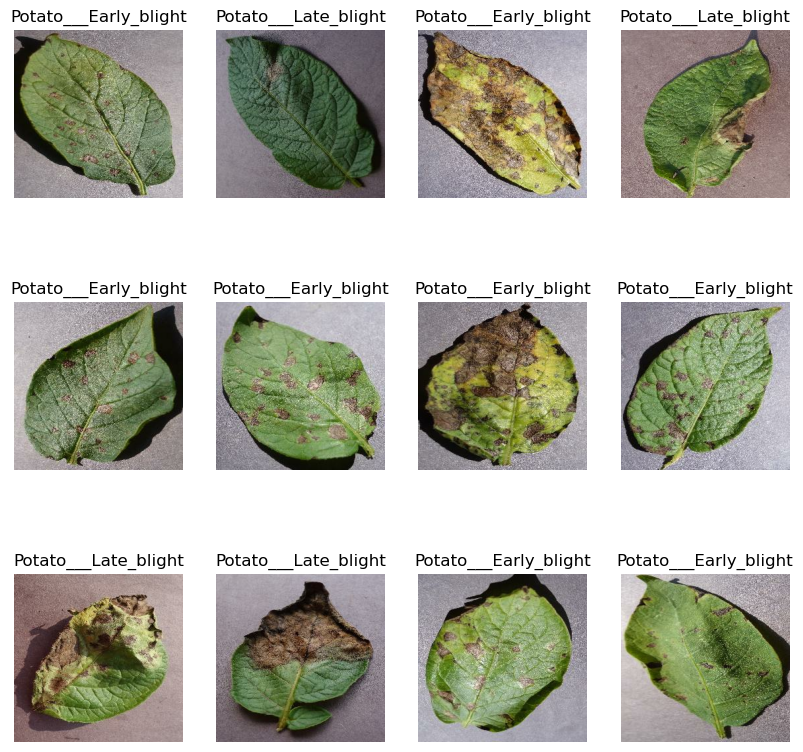

In [38]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [39]:
len(dataset)

68

In [40]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [41]:
train_ds = dataset.take(54)
len(train_ds)

54

In [42]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [43]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [44]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [45]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [46]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
     ds_size = len(ds)
     if shuffle:
          ds = ds.shuffle(shuffle_size, seed=12)
    
     train_size = int(train_split * ds_size)
     val_size = int(val_split*ds_size)

     train_ds = ds.take(train_size)

     val_ds = ds.skip(train_size).take(val_size)
     test_ds = ds.skip(train_size).skip(val_size)
     
     return train_ds , val_ds, test_ds

In [47]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [48]:
len(train_ds)

54

In [49]:
len(val_ds)

6

In [50]:
len(test_ds)

8

In [51]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [52]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [53]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [58]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_21 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (32, 60, 60, 64)         

In [60]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [61]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
54/54 [==============================] - 56s 1s/step - loss: 0.9158 - accuracy: 0.5012 - val_loss: 0.8186 - val_accuracy: 0.4844
Epoch 2/30
54/54 [==============================] - 56s 1s/step - loss: 0.7099 - accuracy: 0.6834 - val_loss: 0.5143 - val_accuracy: 0.7708
Epoch 3/30
54/54 [==============================] - 58s 1s/step - loss: 0.5151 - accuracy: 0.7922 - val_loss: 0.4395 - val_accuracy: 0.8073
Epoch 4/30
54/54 [==============================] - 58s 1s/step - loss: 0.3377 - accuracy: 0.8709 - val_loss: 0.2743 - val_accuracy: 0.8802
Epoch 5/30
54/54 [==============================] - 59s 1s/step - loss: 0.2713 - accuracy: 0.8860 - val_loss: 0.3159 - val_accuracy: 0.8490
Epoch 6/30
54/54 [==============================] - 59s 1s/step - loss: 0.2815 - accuracy: 0.8889 - val_loss: 0.2012 - val_accuracy: 0.9323
Epoch 7/30
54/54 [==============================] - 60s 1s/step - loss: 0.1878 - accuracy: 0.9242 - val_loss: 0.2055 - val_accuracy: 0.9115
Epoch 8/30
54/54 [==

In [62]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 298ms/step - loss: 0.0166 - accuracy: 0.9883


In [63]:
scores

[0.01655983366072178, 0.98828125]

In [64]:
history

In [65]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
history.history['accuracy']

[0.5011574029922485,
 0.6834490895271301,
 0.7922453880310059,
 0.8709490895271301,
 0.8859953880310059,
 0.8888888955116272,
 0.9241898059844971,
 0.9357638955116272,
 0.9444444179534912,
 0.9606481194496155,
 0.9785879850387573,
 0.9421296119689941,
 0.9716435074806213,
 0.9577546119689941,
 0.9704861044883728,
 0.9421296119689941,
 0.9884259104728699,
 0.9947916865348816,
 0.9947916865348816,
 0.9681712985038757,
 0.9982638955116272,
 0.9965277910232544,
 0.9895833134651184,
 0.9965277910232544,
 0.9849537014961243,
 0.9884259104728699,
 0.9982638955116272,
 1.0,
 1.0,
 1.0]

In [71]:
history.history['loss'][:5]

[0.9157722592353821,
 0.7098958492279053,
 0.5150787830352783,
 0.3376549482345581,
 0.2713180184364319]

In [72]:
type(history.history['loss'])

list

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

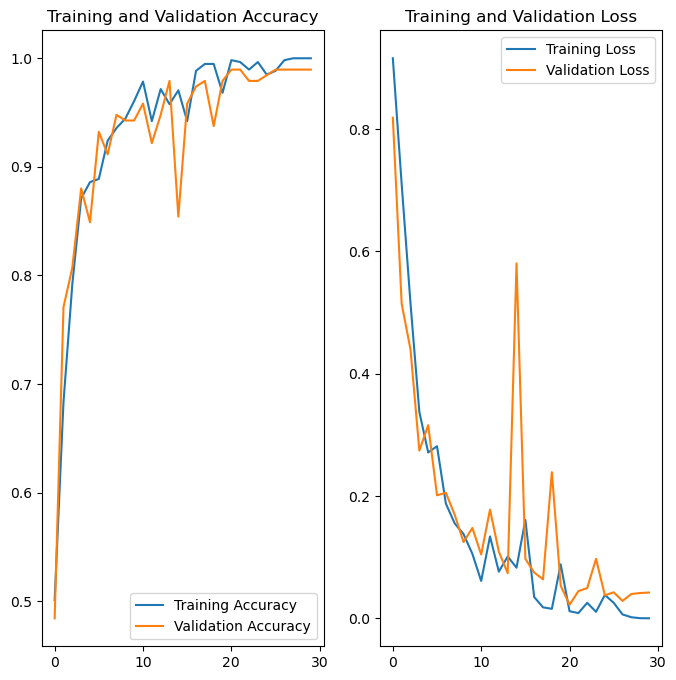

In [80]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 372ms/step
predicted label: Potato___Early_blight


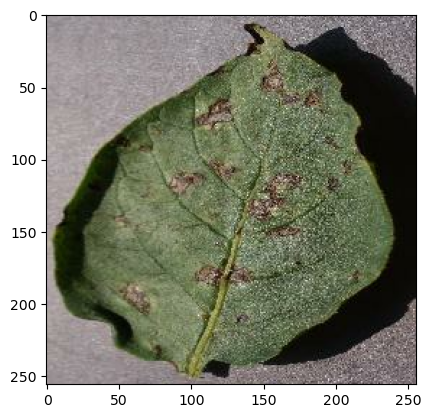

In [82]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [83]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


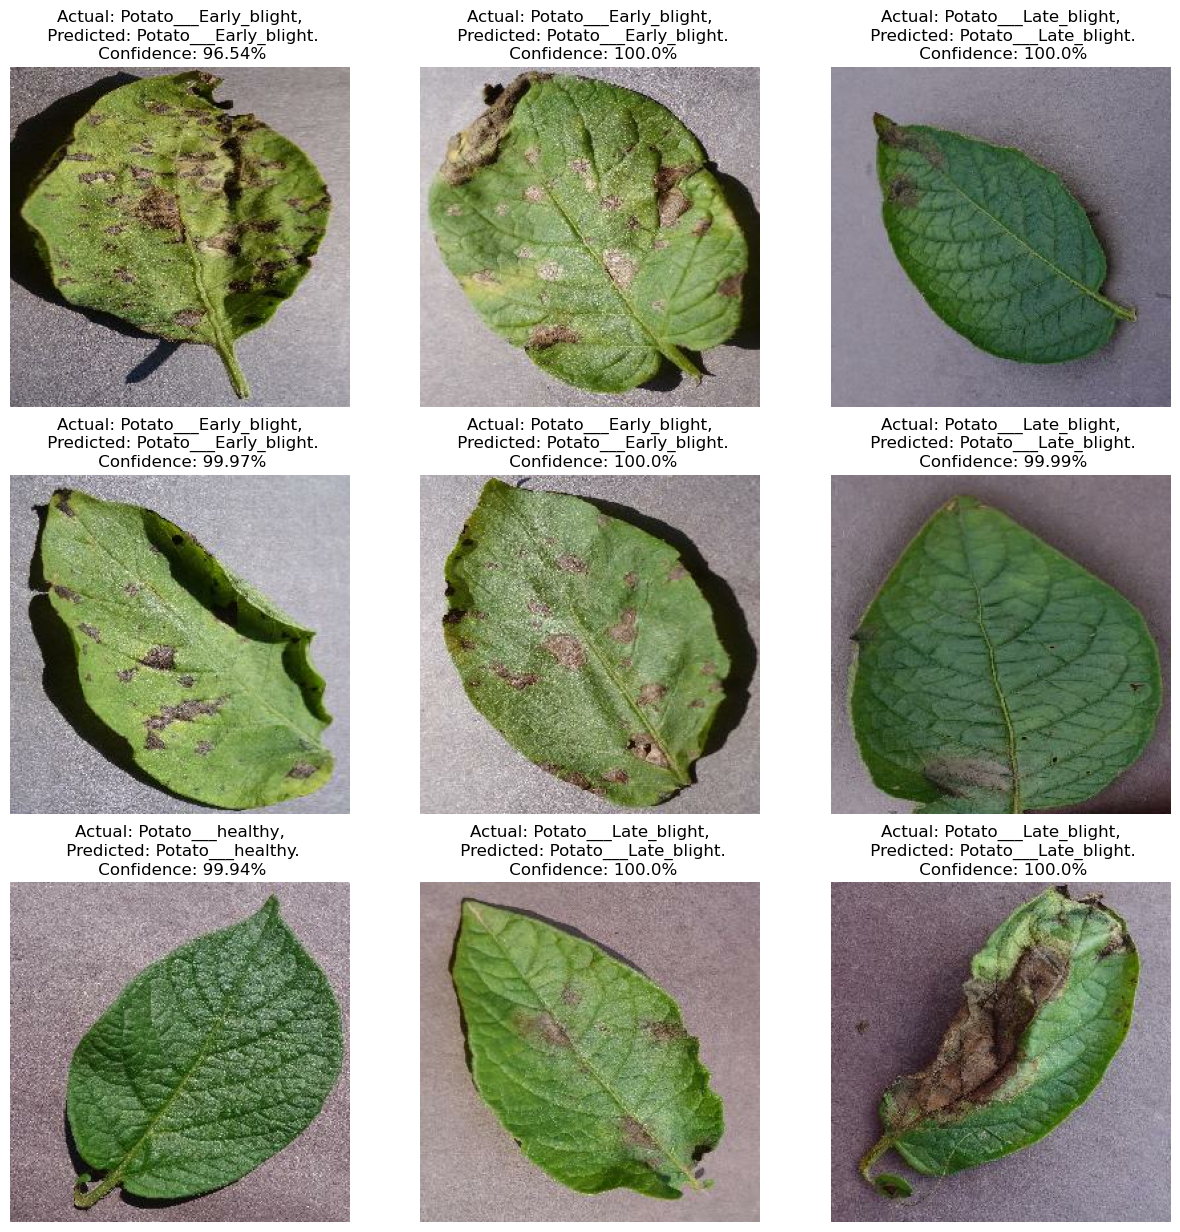

In [90]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [1]:
model_version=1
model.save(f"../models/{model_version}")

NameError: name 'model' is not defined